## **HW**

### **1) Part 1의 code를 수정해서 (Strong likelihood, Weak Likelihood) X (Uniformative prior, Weak prior,Strong prior)의 6가지 경우 비교해보기**

In [7]:
import numpy as np
import scipy
import scipy.stats as st
import scipy.special as sc
import matplotlib.pyplot as plt
import math
import scipy.special

In [ ]:
class beta_binomial_model:
    
    def __init__(self, alpha, beta, theta, n, num_success):
        
        self.alpha = alpha
        self.beta = beta
        self.theta = theta
        self.n = n
        self.num_success = num_success
    
    def prior(self):
        
        return st.beta(self.alpha, self.beta)
    
    def likelihood(self):
        
        return scipy.special.comb(self.n, self.num_success) * self.theta**self.num_success * (1- self.theta) **(self.n - self.num_success)
    
    def post(self):
        
        return st.beta(self.alpha + self.num_success, self.beta + self.n - self.num_success)
    
    def plotting(self, plot_title):
        
        plt.figure(figsize=(8, 6))
        plt.style.use('ggplot')
        plt.plot(self.theta, self.prior().pdf(self.theta), label = 'Prior', c = 'blue')
        plt.plot(self.theta, self.likelihood(), label='Likelihood', c= 'orange')
        plt.plot(self.theta, self.post().pdf(self.theta), label = 'Posterior', c = 'red')
        plt.xlabel(r'$\theta$', fontsize=14) ; plt.ylabel('Density', fontsize=16); plt.legend()
        plt.title(plot_title)


#### **Strong likelihood + uniformative prior**

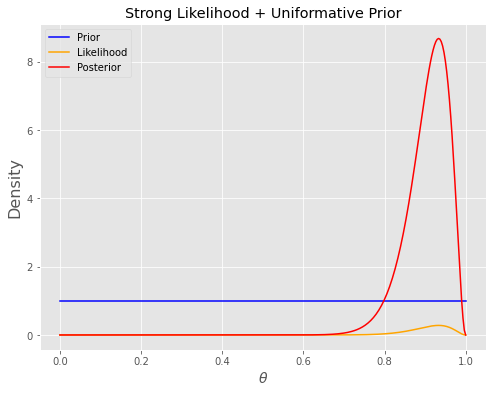

In [ ]:
beta_binomial = beta_binomial_model(alpha=1,beta=1,theta=np.linspace(0,1,300),n=30,num_success=28)
beta_binomial.plotting('Strong Likelihood + Uniformative Prior')

#### **Strong likelihood + Weak prior**

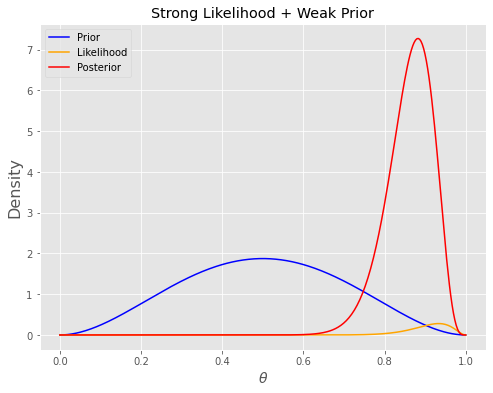

In [ ]:
beta_binomial = beta_binomial_model(alpha=3,beta=3,theta=np.linspace(0,1,300),n=30,num_success=28)
beta_binomial.plotting('Strong Likelihood + Weak Prior')

#### **Strong likelihood + Strong prior**

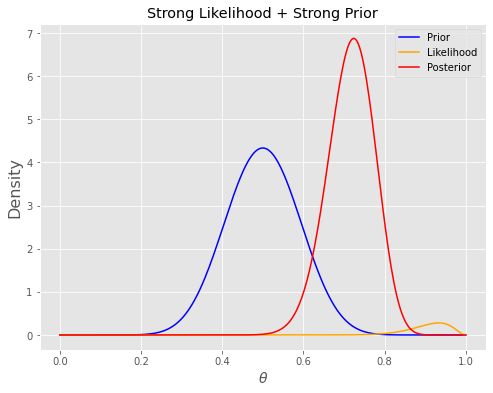

In [ ]:
beta_binomial = beta_binomial_model(alpha=15,beta=15,theta=np.linspace(0,1,300),n=30,num_success=28)
beta_binomial.plotting('Strong Likelihood + Strong Prior')

#### **Weak likelihood + Uniformative prior**

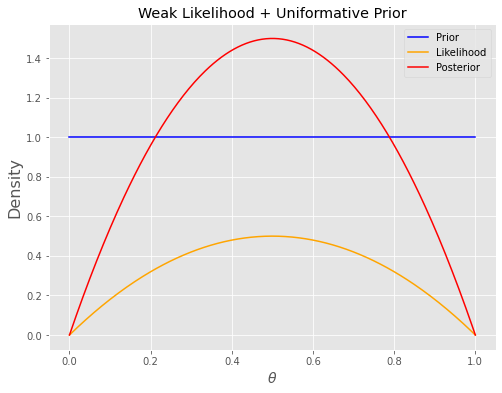

In [ ]:
beta_binomial = beta_binomial_model(alpha=1,beta=1,theta=np.linspace(0,1,300),n=2,num_success=1)
beta_binomial.plotting('Weak Likelihood + Uniformative Prior')

#### **Weak likelihood + Weak prior**

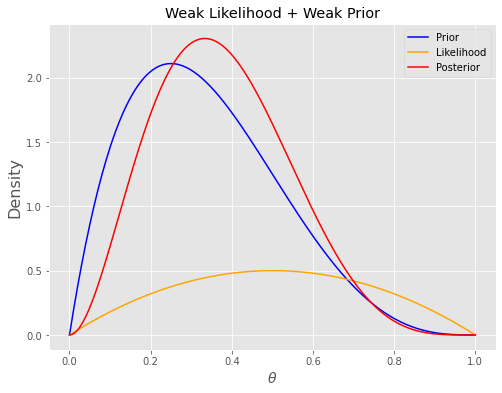

In [ ]:
beta_binomial = beta_binomial_model(alpha=2,beta=4,theta=np.linspace(0,1,300),n=2,num_success=1)
beta_binomial.plotting('Weak Likelihood + Weak Prior')

#### **Weak likelihood + Strong prior**

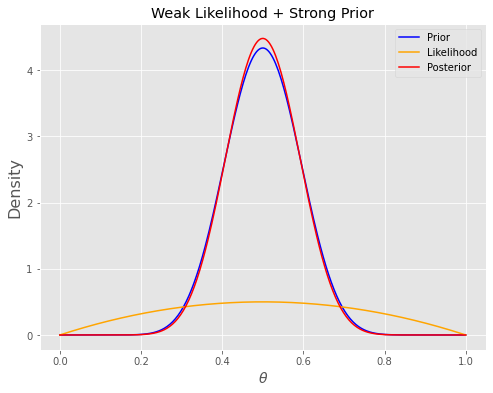

In [ ]:
beta_binomial = beta_binomial_model(alpha=15,beta=15,theta=np.linspace(0,1,300),n=2,num_success=1)
beta_binomial.plotting('Weak Likelihood + Strong Prior')

### **2)BDA 1.3 Exercise**

문제 내용 - 눈동자 색을 결정하는 유전자
xx - 파란 눈동자 / Xx, XX - 갈색 눈동자

파란 눈동자 인구의 비율 - p^2
Xx인 인구의 비율 - 2p(1-p)



#### **2-a) show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$** 

#### **2-b) Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes.** 

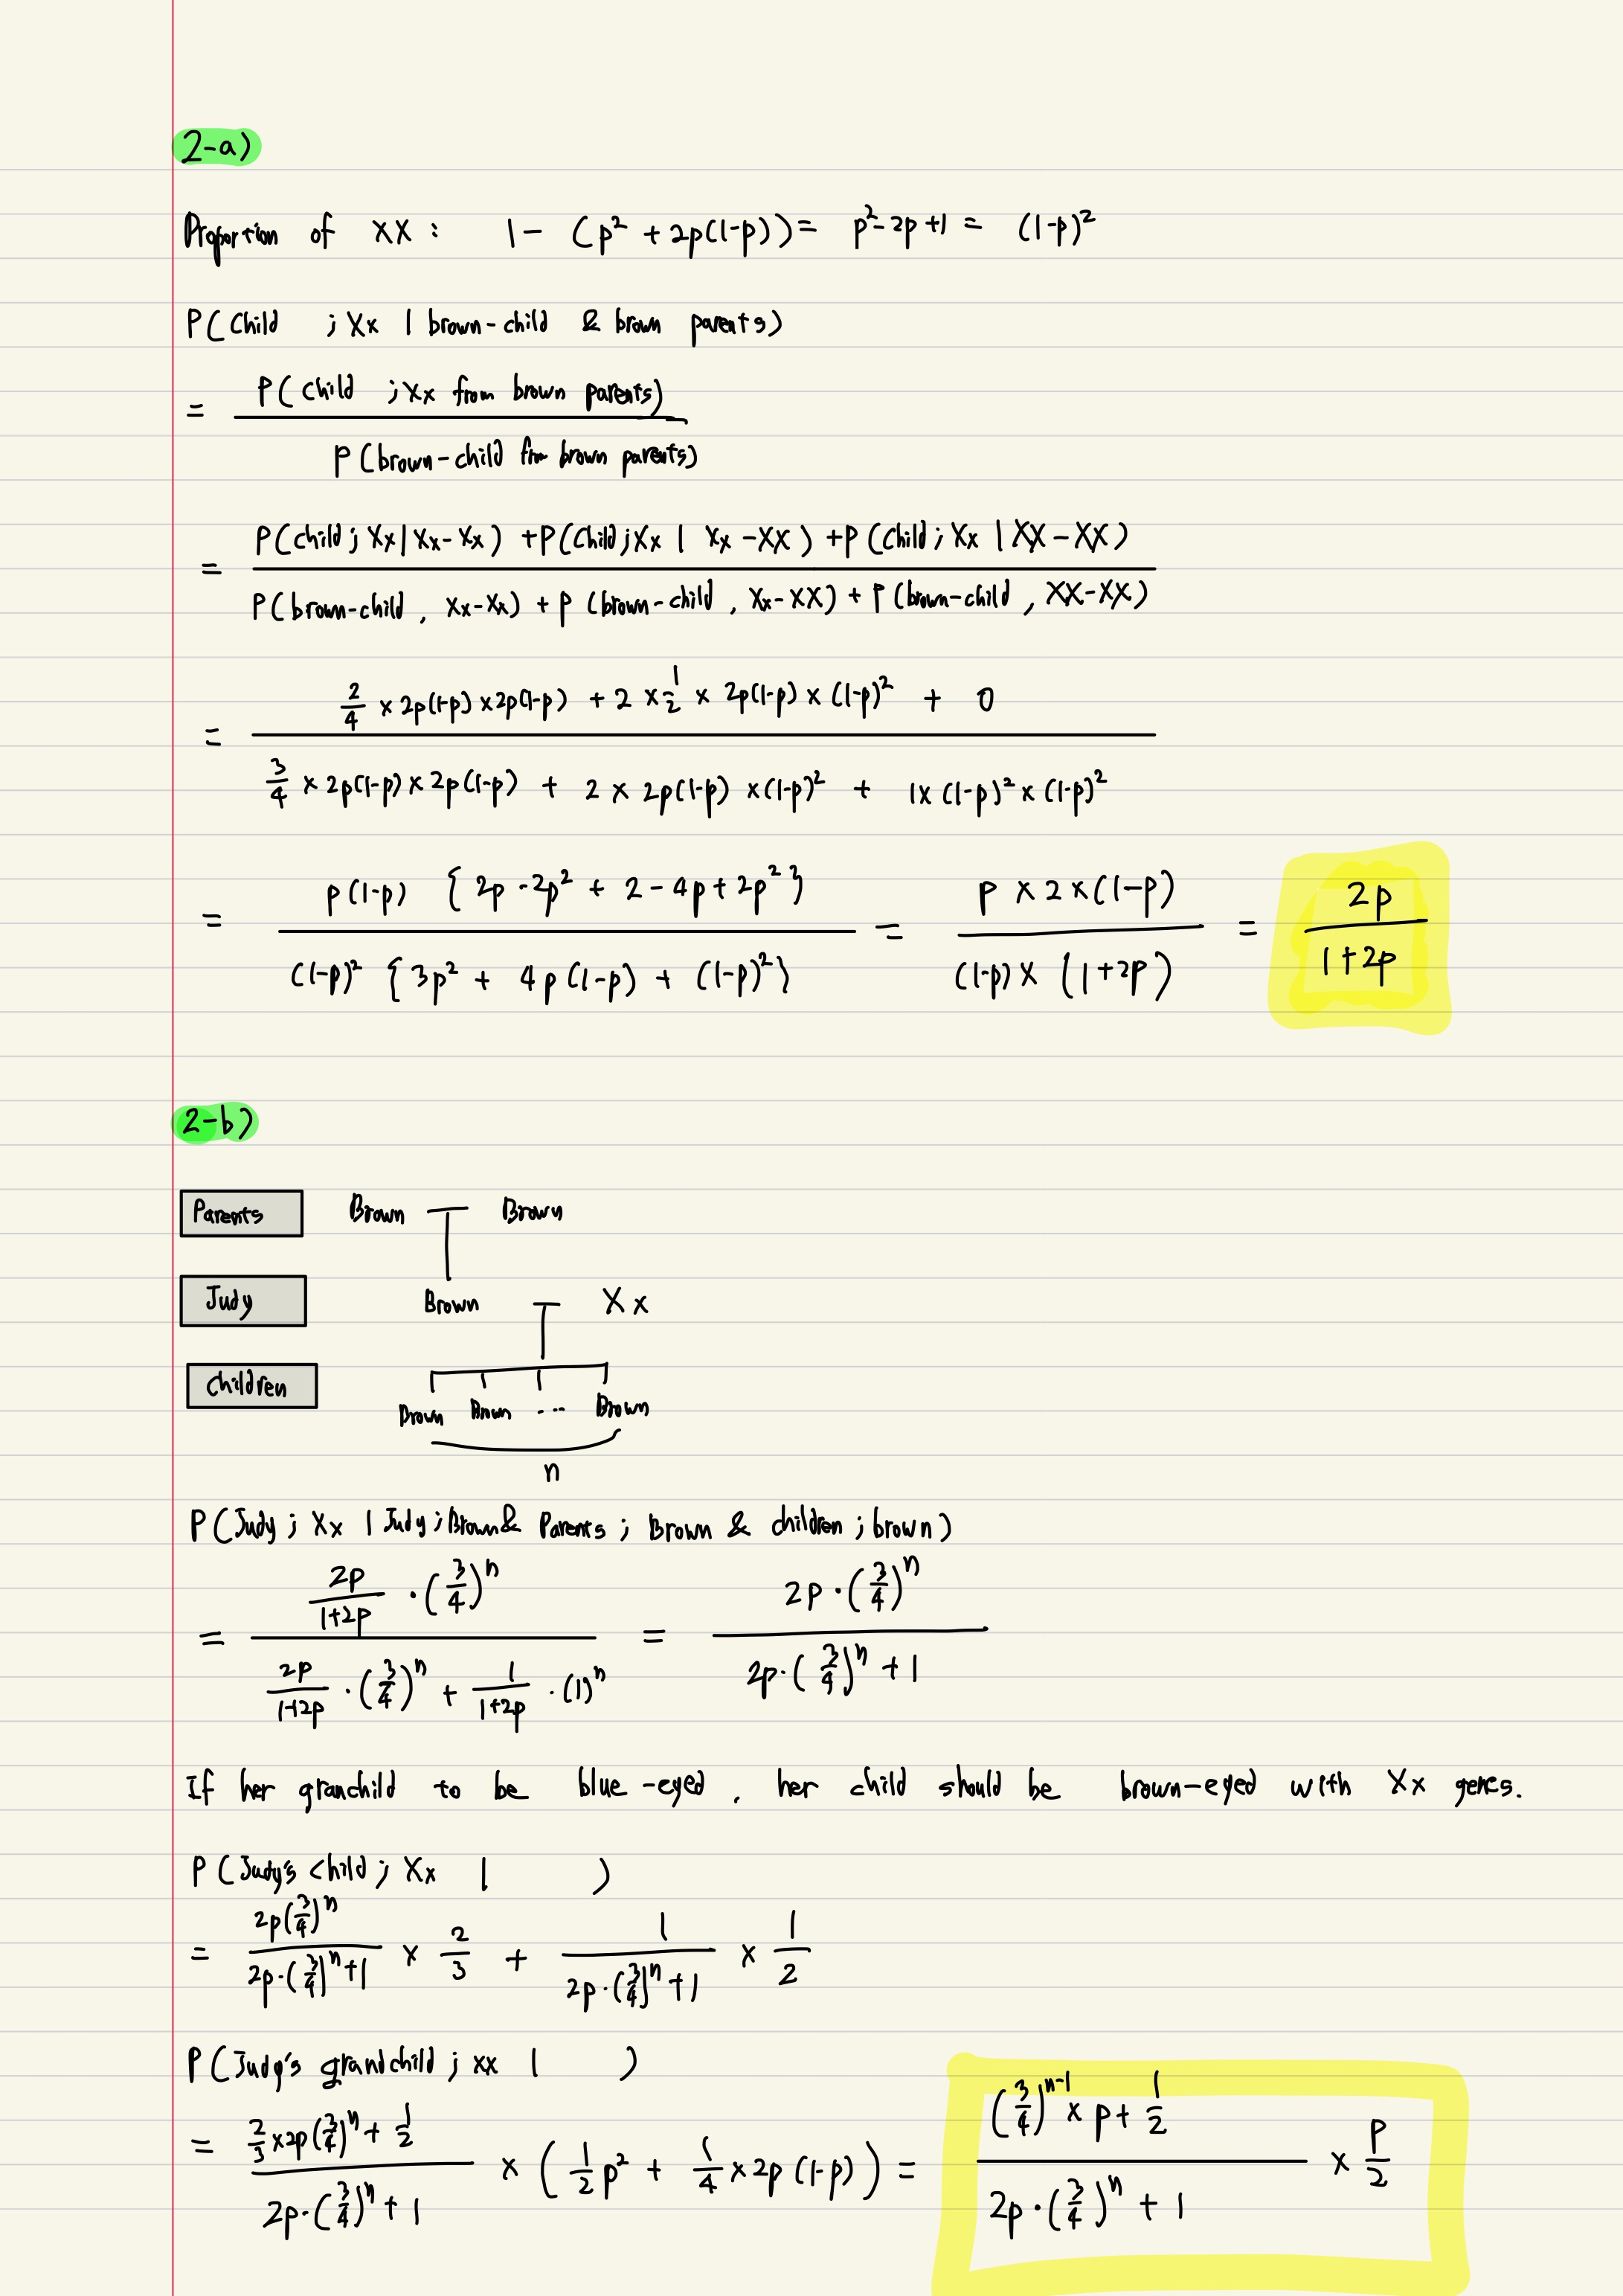

In [10]:
from IPython.display import Image
Image("/content/2.jpg")

### **3)새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**

#### **Beta distribution으로 위의 belief를 survival rate에 관한 prior distribution으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가?**

In [ ]:
st.beta.cdf(0.97,9,1)

0.7602310586545651

In [ ]:
st.beta.cdf(0.8,9,1)

0.13421772800000006

In [ ]:
i=1
while (st.beta.cdf(0.97,9*i,i)-st.beta.cdf(0.8,9*i,i)<0.95):
  i +=1

i  

5

#### **이제 data gathering. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 Posterior Distribution 구하기.**

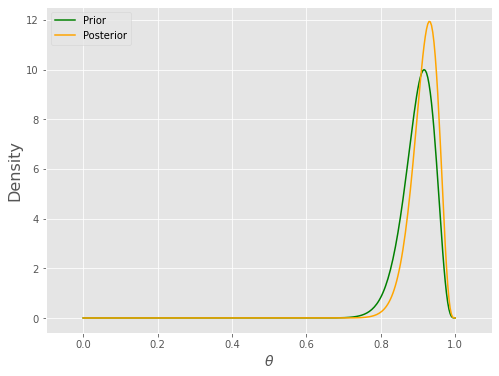

In [ ]:
pr = st.beta(45,5)
post = st.beta(55,5)

theta = np.linspace(0,1,300)
plt.figure(figsize=(8, 6)); plt.style.use('ggplot')
plt.plot(theta, pr.pdf(theta), label='Prior', c='green') 
plt.plot(theta, post.pdf(theta), label='Posterior', c='orange')
plt.xlim([-0.10, 1.10]) ; plt.xlabel(r'$\theta$', fontsize=14) ; plt.ylabel('Density', fontsize=16) ;plt.legend()

#### **다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)**

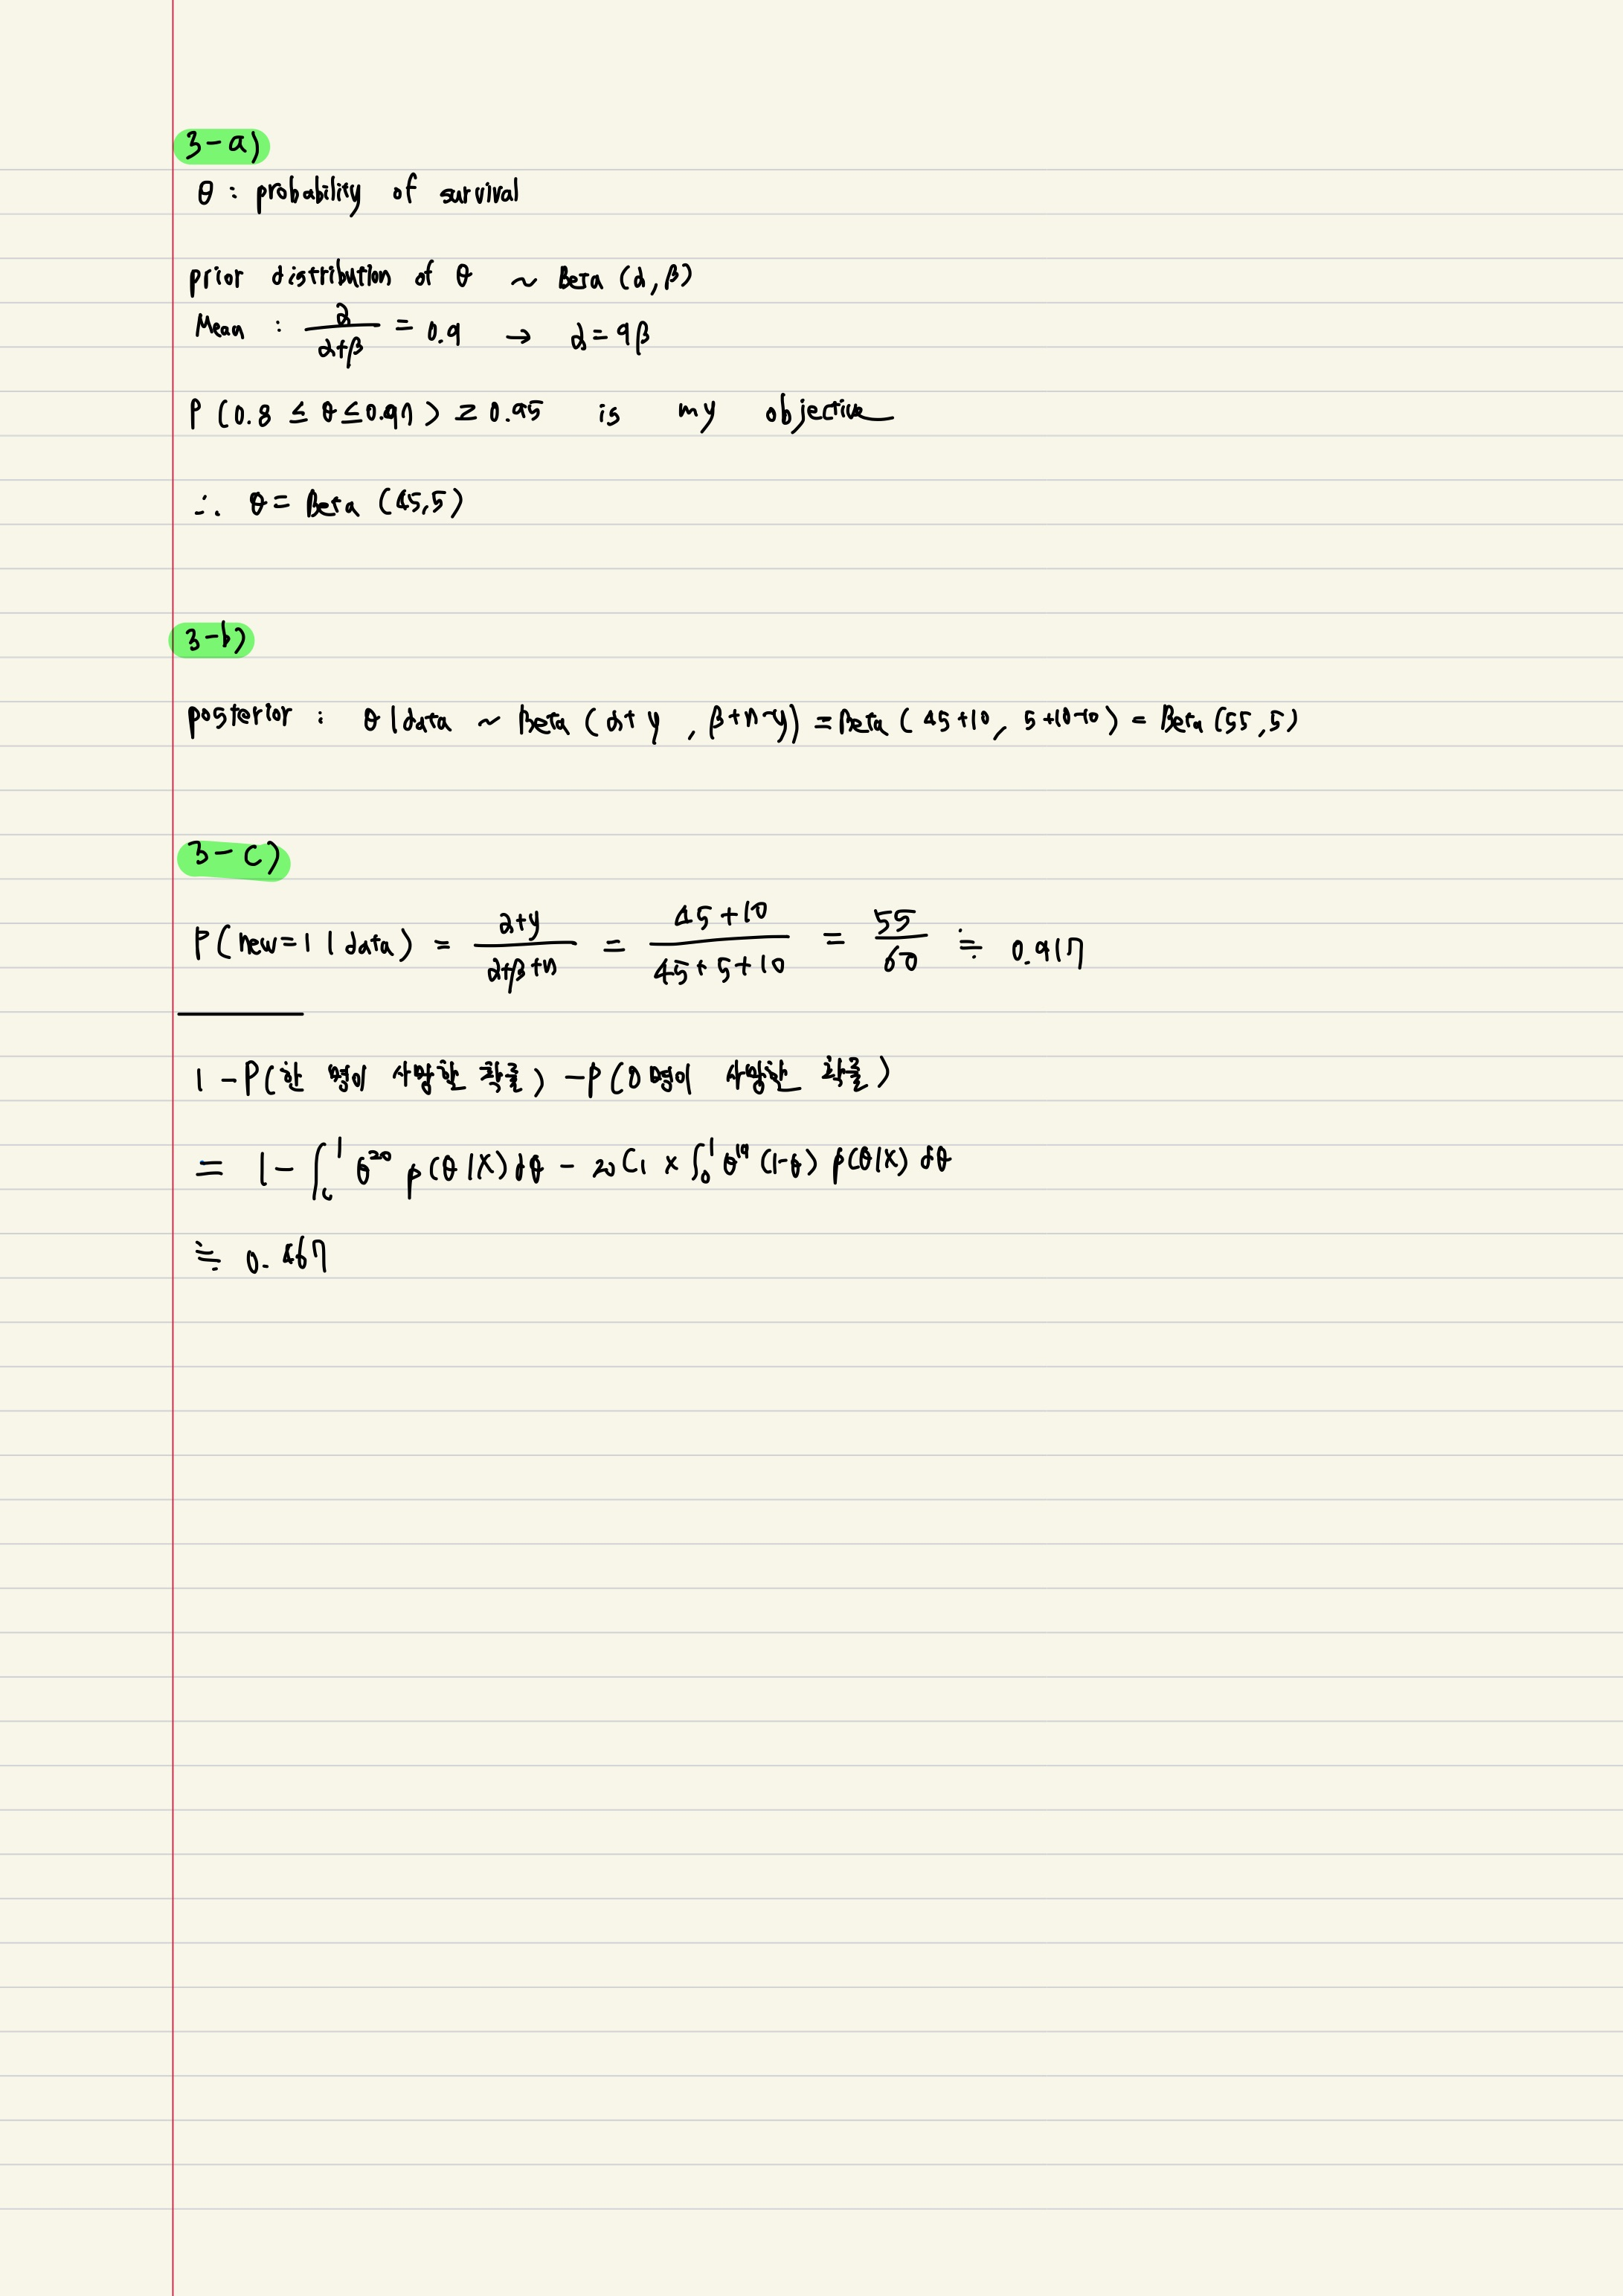

In [11]:
Image("/content/3.jpg")